## **VISÃO COMPUTACIONAL - PROVA FINAL - 02/12/2021**


**NOME:** Victor Vergara Arcoverde de Albuquerque Cavalcanti

**QUESTÃO 01 (2.0 pontos)** Considere a seguinte função em OpenCV/Python e sua aplicação na imagem. Descreva brevemente o que faz este programa.

In [17]:
import cv2 as cv

def enigma(img):
    img = img.copy() 
    skel = img.copy()

    skel[:,:] = 0
    kernel = cv.getStructuringElement(cv.MORPH_CROSS, (3,3))

    for i in range(10):
        eroded = cv.morphologyEx(img, cv.MORPH_ERODE, kernel)
        temp = cv.morphologyEx(eroded, cv.MORPH_DILATE, kernel)
        temp  = cv.subtract(img, temp)
        skel = cv.bitwise_or(skel, temp)
        img[:,:] = eroded[:,:]
    return skel

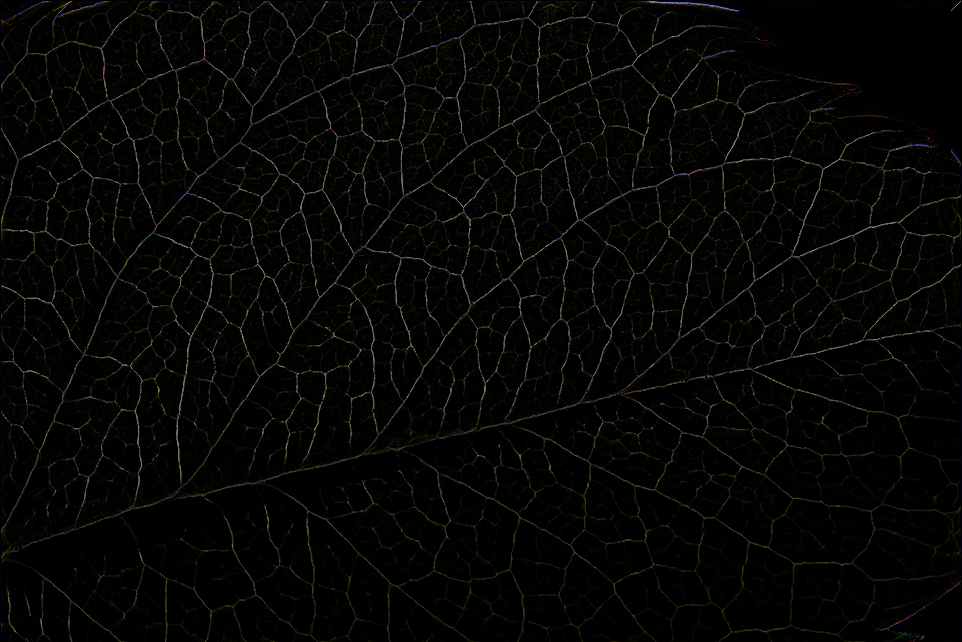

In [18]:
from google.colab.patches import cv2_imshow
imagem = cv.imread('folha.png')
cv2_imshow(enigma(imagem))


In [19]:
# A função pega o esqueleto da imagem, ao erodar e depois dilatar a imagem se forma um esqueleto do seu contorno,
#e depois faz uma operação de bitwise or para manter o contorno claro.
# O processo de erosão e dilatação é repitodo 10 vezes, e ao final de cada operação é feito a operação de bitwise com a imagem da iteração passada 
#a fim de melhorar o esqueleto, e a imagem inicial para a próxima iteração é a que foi errosada na iteração atual

**QUESTÃO 02 (2.0 pontos)** O código abaixo detecta moedas de dólar de uma determinando tamanho. Modifique este código para detectar, segmentar e exibir a quantidade de moedas de 1 dólar. Neste imagem, temos quatro moedas de 1 dólar (moedas maiores).

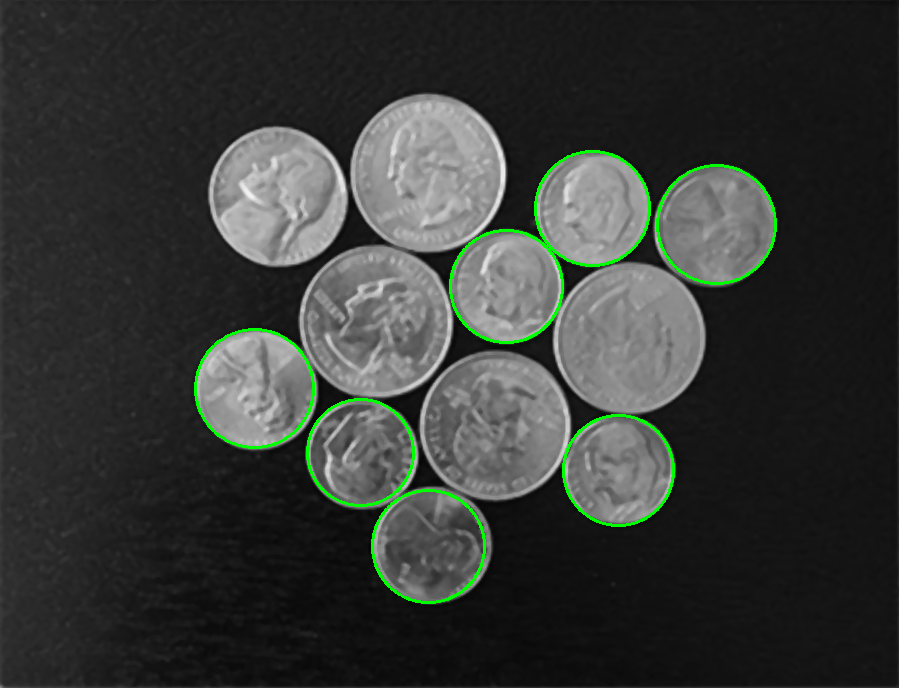

In [5]:
import numpy as np
img = cv.imread('coins.png',0)
img = cv.medianBlur(img,5)
cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)
circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,20,param1=50,param2=40,minRadius=45,maxRadius=60)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
cv2_imshow(cimg)

Foram encontradas 4 moedas de 1 dólar


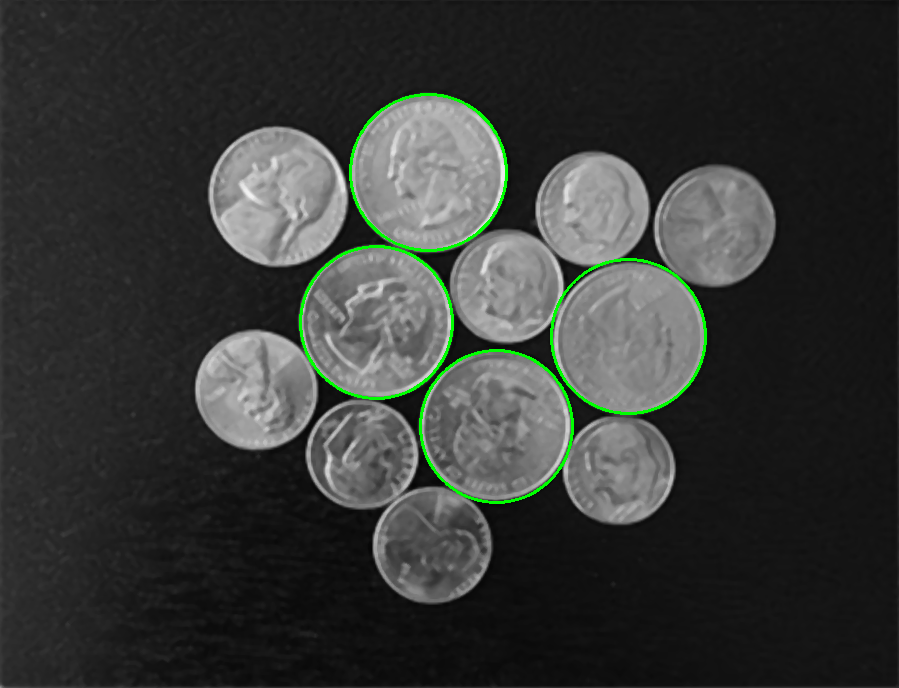

In [23]:
import numpy as np
img = cv.imread('coins.png',0)
img = cv.medianBlur(img,5)
cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)
circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,20,param1=50,param2=40,minRadius=75,maxRadius=90)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
print("Foram encontradas", len(circles[0,:]), "moedas de 1 dólar")
cv2_imshow(cimg)

**QUESTÃO 03 (3.0 pontos)** A Transformação de Watershed é bastante utilizada na segmentação de objetos de uma cena. Abaixo, temos uma documentação de como funciona esta transformação.

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_watershed/py_watershed.html

Leia esta documentação e, spós isto, aplique esta transformação para segmentar e marcar as moedas da imagem abaixo:


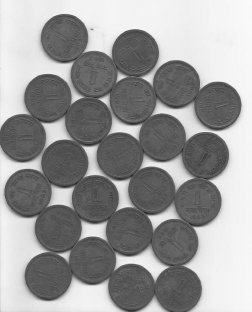

In [ ]:
img = cv.imread('water_coins.jpg',0)
cv2_imshow(img)

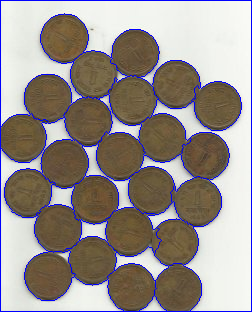

In [34]:
from matplotlib import pyplot as plt

img = cv.imread('water_coins.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
sure_bg = cv.dilate(opening,kernel,iterations=3)

dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)

sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

ret, markers = cv.connectedComponents(sure_fg)
markers = markers+1
markers[unknown==255] = 0
markers = cv.watershed(img,markers)
img[markers == -1] = [255,0,0]

cv2_imshow(img)

**QUESTÃO 04 ((3.0 pontos)** Em Visão Estéreo, isto é, aquela que utiliza duas imagens (câmera direita e câmera esquerda), podemos querer calcular qual foi a variação geométrica de uma imagem para outra. Para isto, podemos seguir o seguinte algoritmo:

1.   Encontre quatro pontos na primeira imagem
2.   Encontre os quatro pontos correpondentes na segunda imagem
3.   Calcule uma homografia com estes oito pontos
4.   Aplique uma transformação de perspectiva (warpPerspective) na primeira imagem, usando a homografia calculada, obtendo a variação geométrica de uma imagem para outra.

Utilizando as duas imagens mostradas abaixo, implemente o algoritmo acima e mostre a imagem resultante do passo 4.



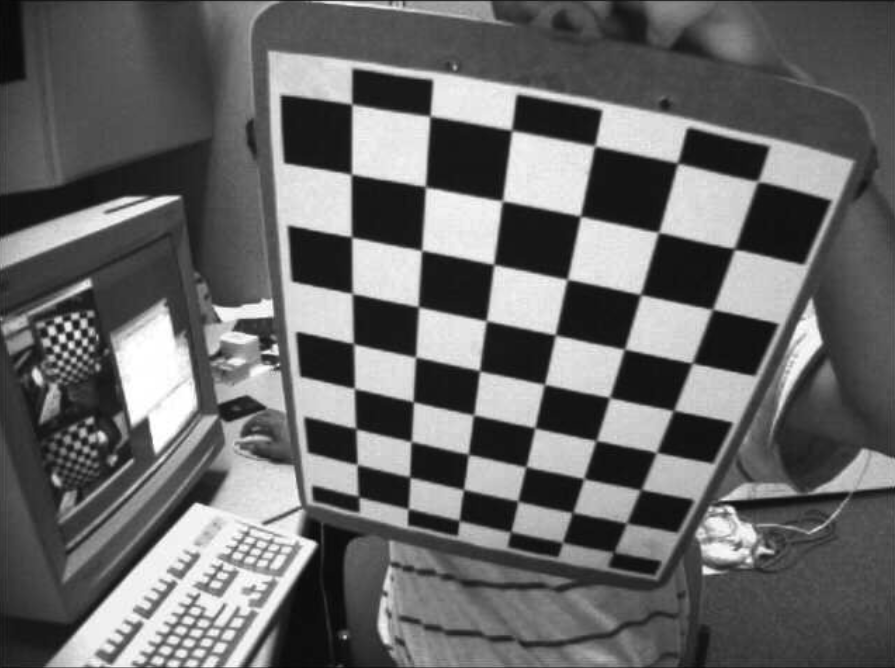

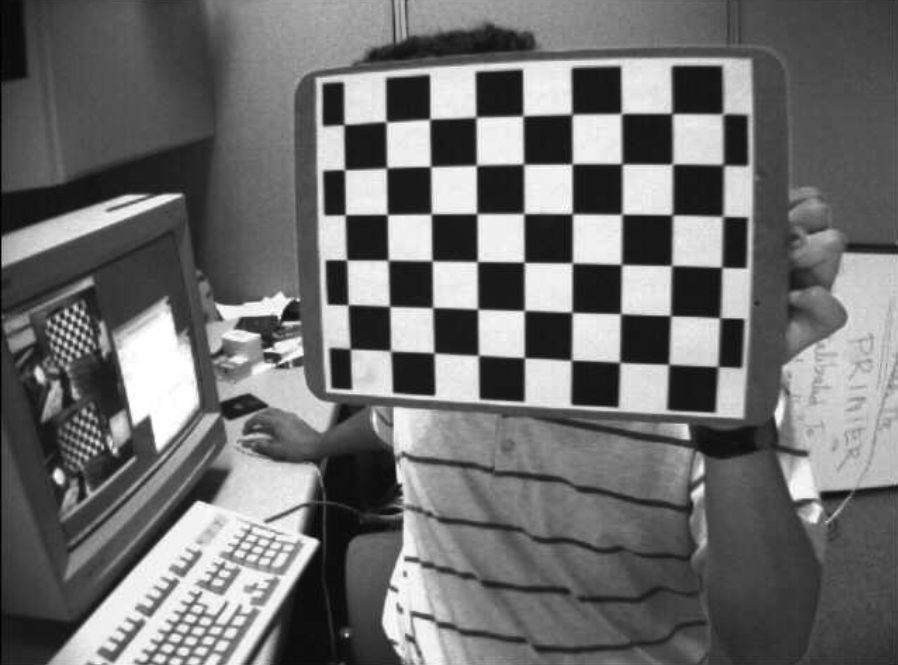

In [36]:
esquerda = cv.imread('esquerda.png',0)
cv2_imshow(esquerda)
direita = cv.imread('direita.png',0)
cv2_imshow(direita)

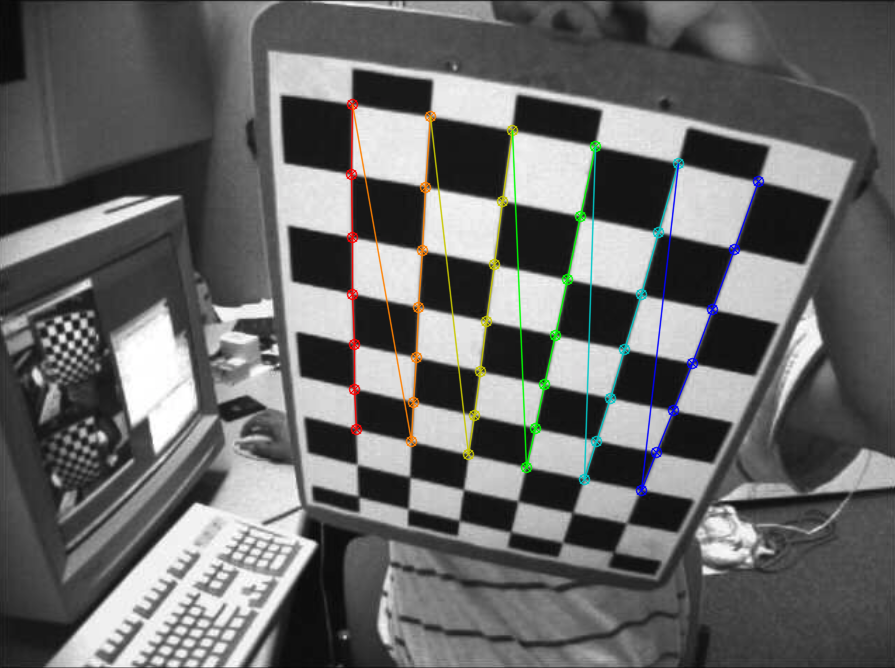

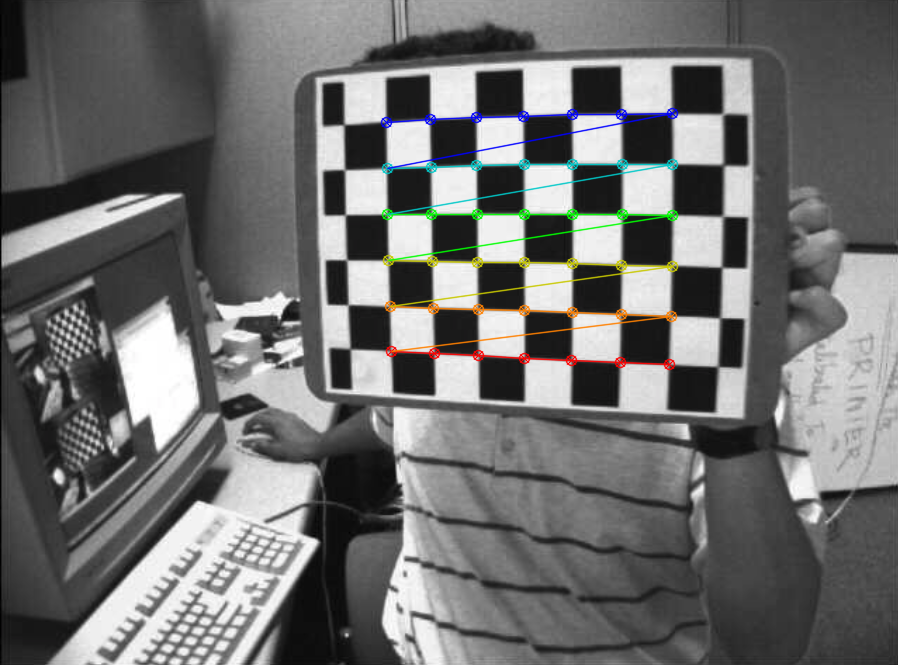

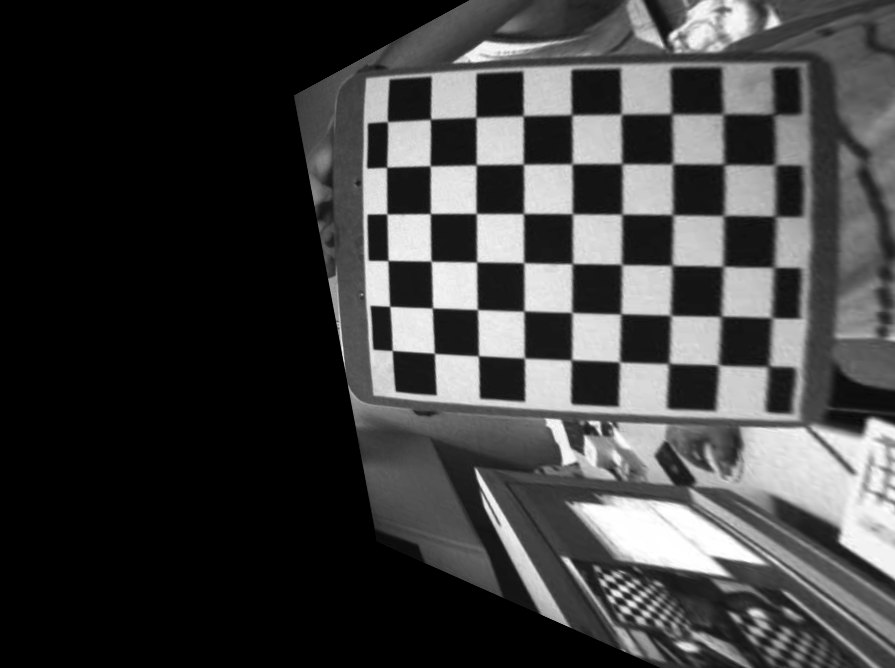

In [49]:
import glob
#Baseado em:
#https://www.educba.com/opencv-warpperspective/
#https://learnopencv.com/image-alignment-feature-based-using-opencv-c-python/#viewSource
#N consegui fazer apenas 4 pontos, pega 42

objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

objV = [] # pontos 3D dos objetos
imgV = [] # pontos 3D das imagens

images = ['esquerda.png','direita.png']

for imgSide in images:
    img = cv.imread(imgSide)
    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

    # Encontra 42 (7x6) corners no tabuleiro de xadrez
    ret, corners = cv.findChessboardCorners(gray, (7,6),None)

    if ret == True:
        objV.append(objp)
        # critério de término de busca
        criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
        corner = cv.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgV.append(corner)

        # Desenha e mostra os corners nas diversas imagens
        img = cv.drawChessboardCorners(img, (7,6), corner,ret)
        cv2_imshow(img)
#print(imgV)
h, s = cv.findHomography(imgV[0], imgV[1])
hEsq, wEsq = esquerda.shape
esquerdaWarp = cv.warpPerspective(esquerda, h, (wEsq, hEsq))
cv2_imshow(esquerdaWarp)